<a href="https://colab.research.google.com/github/jyothikumargoud/ML/blob/main/multiple_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [120]:
df  = pd.read_csv('economic_index.csv')

In [121]:
df.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [122]:
df.drop(columns=["Unnamed: 0","year","month"],axis=1,inplace=True)


In [123]:
df.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [124]:
#check the numm values
df.isnull().sum()#here there are no null

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

In [125]:
df.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


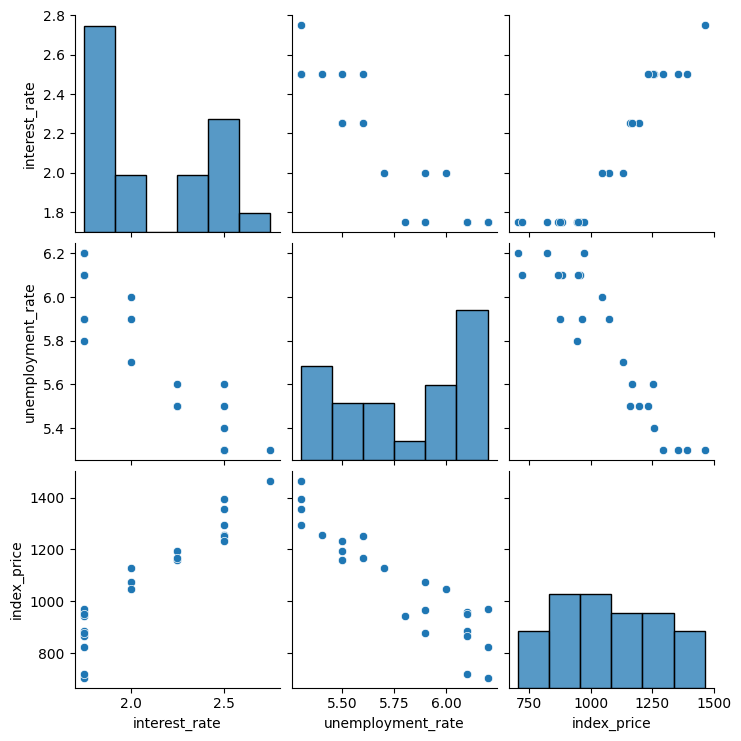

In [126]:
sns.pairplot(df)

Text(0, 0.5, 'interest_rate')

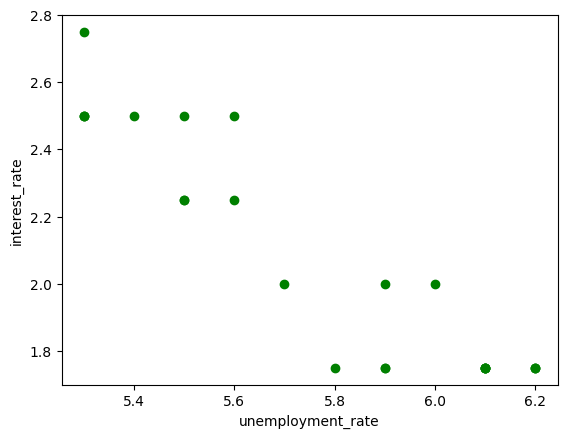

In [127]:
#visuvalizing the data points more closly
plt.scatter(df['unemployment_rate'],df['interest_rate'],color = 'g')
plt.xlabel('unemployment_rate')
plt.ylabel('interest_rate')

In [128]:
#get the dependent and independent features

In [129]:
x=df.iloc[:,:-1]# this means take ever columns and from every column remove the last column
y=df.iloc[:,-1]#this means take all column and print the last column
#or u can do like this also ,this will be problem if u have the many independent features
#x=df[['interest_rate','unemployment_rate']]
#y=df['index_price']

In [130]:
print("independent features")
print(x)
print()
print("dependent features")
print(y)

independent features
    interest_rate  unemployment_rate
0            2.75                5.3
1            2.50                5.3
2            2.50                5.3
3            2.50                5.3
4            2.50                5.4
5            2.50                5.6
6            2.50                5.5
7            2.25                5.5
8            2.25                5.5
9            2.25                5.6
10           2.00                5.7
11           2.00                5.9
12           2.00                6.0
13           1.75                5.9
14           1.75                5.8
15           1.75                6.1
16           1.75                6.2
17           1.75                6.1
18           1.75                6.1
19           1.75                6.1
20           1.75                5.9
21           1.75                6.2
22           1.75                6.2
23           1.75                6.1

dependent features
0     1464
1     1394
2     1357
3

In [131]:
y.head()

0    1464
1    1394
2    1357
3    1293
4    1256
Name: index_price, dtype: int64

In [132]:
x.head()

,interest_rate,unemployment_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.4


In [133]:
from sklearn.model_selection import train_test_split

In [134]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=40)

In [135]:
#plot the regression plot with seaborn

<Axes: xlabel='interest_rate', ylabel='index_price'>

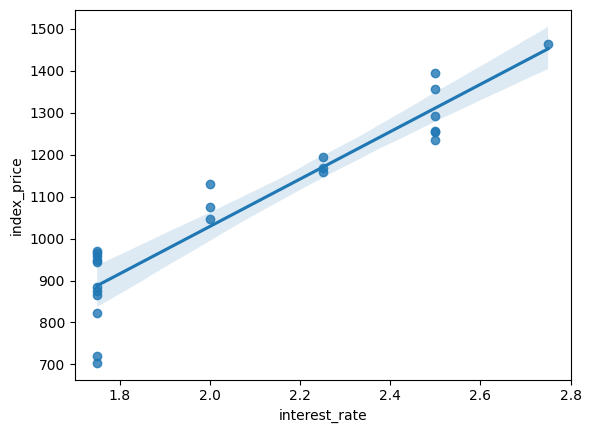

In [136]:
sns.regplot(x=df['interest_rate'], y=df['index_price'])


<Axes: xlabel='unemployment_rate', ylabel='index_price'>

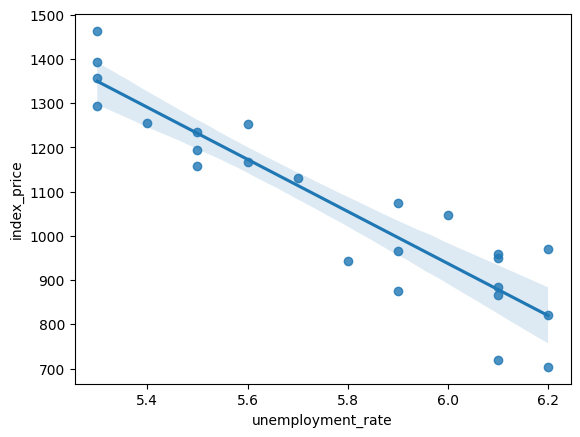

In [137]:
sns.regplot(x=df['unemployment_rate'],y = df['index_price'])

<Axes: xlabel='unemployment_rate', ylabel='interest_rate'>

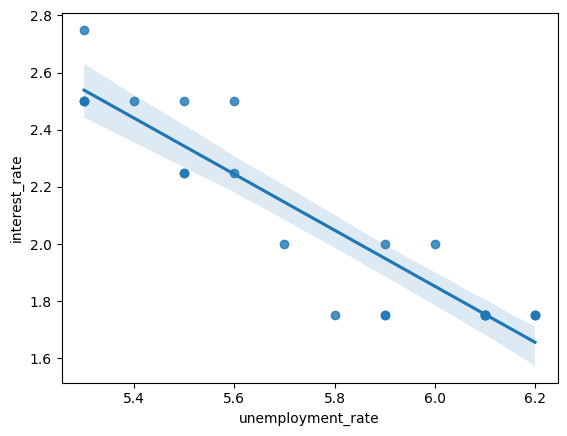

In [138]:
sns.regplot( x = df['unemployment_rate'],y = df['interest_rate'])

In [139]:
from sklearn.preprocessing import StandardScaler

In [140]:
scaler = StandardScaler()
x_train  = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [141]:
x_train

array([[-0.93508297,  1.25108648],
       [-0.93508297,  0.31277162],
       [-0.93508297,  1.25108648],
       [-0.93508297,  0.93831486],
       [ 1.99213329, -1.56385811],
       [ 0.52852516, -0.62554324],
       [-0.93508297,  0.31277162],
       [-0.20327891,  0.31277162],
       [ 1.26032922, -1.56385811],
       [-0.93508297,  0.93831486],
       [-0.20327891, -0.31277162],
       [-0.93508297,  1.25108648],
       [-0.20327891,  0.62554324],
       [ 1.26032922, -1.56385811],
       [-0.93508297,  0.93831486],
       [ 1.26032922, -0.62554324],
       [ 0.52852516, -0.93831486],
       [ 1.26032922, -0.93831486]])

In [142]:
x_test

array([[-0.9701425 ,  1.24434203],
       [ 1.21267813, -1.24434203],
       [-0.9701425 ,  0.31108551],
       [-0.9701425 ,  1.24434203],
       [ 0.48507125, -0.62217102],
       [ 1.21267813, -0.93325653]])

In [143]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()

In [144]:
regression.fit(x_train,y_train)

LinearRegression()

In [145]:
from sklearn.model_selection import cross_val_score
validation_score = cross_val_score(regression,x_train,y_train,scoring = 'neg_mean_squared_error',cv = 3)

In [146]:
validation_score

array([-4986.53384258, -7461.07665535, -1568.06593417])

In [147]:
validation_score.mean()

-4671.892144033939

In [148]:
#intercept
regression.intercept_

1071.6666666666665

In [149]:
#coeff
regression.coef_

array([110.7119882 , -86.96054954])

In [150]:
#prediction
y_pred = regression.predict(x_test)
y_pred


array([ 856.05159457, 1314.13334002,  937.20809487,  856.05159457,
       1179.47420271, 1287.08117325])

In [151]:
#perfromance metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error
mse  = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(mse)
print(mae,mse,rmse)

56.53565684621816 5405.490992395733 73.52204426153922


In [152]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
score


0.8827566637147143

In [153]:
#model accuracy is 88 percentage

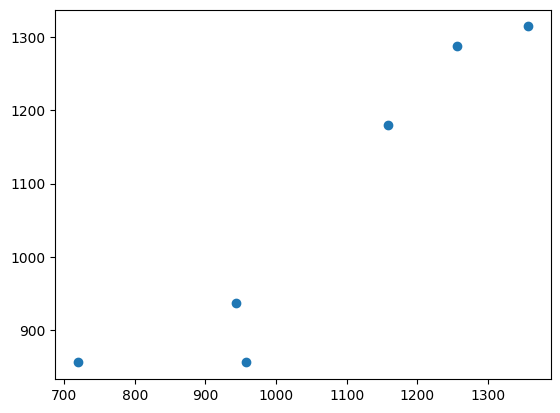

In [154]:
#asumptions
plt.scatter(y_test,y_pred)

In [155]:
residuals  = y_pred-y_test

In [156]:
residuals

15   -101.948405
2     -42.866660
14     -5.791905
23    137.051595
8      20.474203
4      31.081173
Name: index_price, dtype: float64

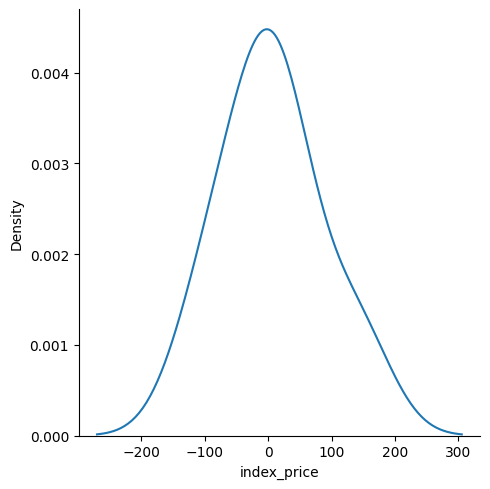

In [157]:
sns.displot(residuals,kind='kde')#kde is kernal density plot

#this indicates the modelperfo is good

In [158]:
#sactter plot with respect to prediction and residuals

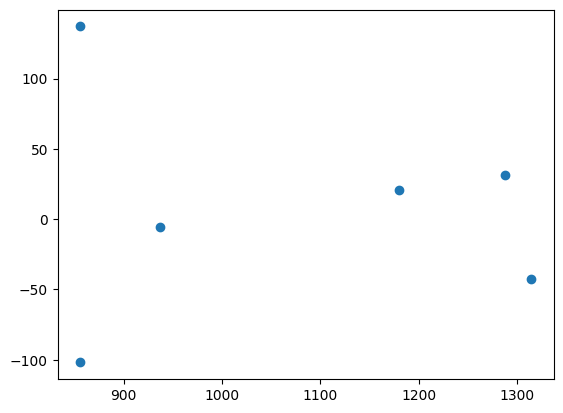

In [159]:
plt.scatter(y_pred,residuals)

In [160]:
#ols method

In [161]:
import statsmodels.api as  sm
model = sm.OLS(y_train,x_train).fit()

In [162]:
model.summary()

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            index_price   R-squared (uncentered):                   0.032
Model:                            OLS   Adj. R-squared (uncentered):             -0.089
Method:                 Least Squares   F-statistic:                             0.2617
Date:                Fri, 14 Jun 2024   Prob (F-statistic):                       0.773
Time:                        17:45:56   Log-Likelihood:                         -151.16
No. Observations:                  18   AIC:                                      306.3
Df Residuals:                      16   BIC:                                      308.1
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1           110.7120    721.519      0.153      0.880   -1418.840    1640.264
x2           -86.9605    721.519     -0.121      0.906   -1616.512    1442.591
==============================================================================
Omnibus:                        2.458   Durbin-Watson:                   0.008
Prob(Omnibus):                  0.293   Jarque-Bera (JB):                1.031
Skew:                          -0.552   Prob(JB):                        0.597
Kurtosis:                       3.392   Cond. No.                         5.18
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""